# DataCamp Network Analysis in Python: Part 1

### Network: Nodes connected by Edges to form a Network/Graph
- Nodes contain information
- as do Edges

NetworkX API - manipulate and analyze network data with Python

[<class 'list'>]
[(1, 2)]


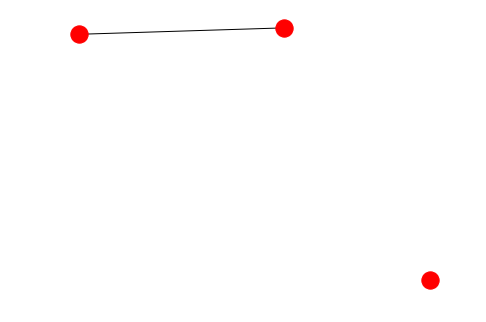

In [5]:
import networkx as nx

#create a network graph incidence
G = nx.Graph()

#add nodes
G.add_nodes_from([list])

#view nodes present
print(G.nodes())

#add edges
G.add_edge(1,2)

#view edges present
print(G.edges())

#assign value to node
G.node[1]['label'] = 'blue'

#return a tuple (node1, dict{'label':'blue'}) of network
G.nodes(data=True)

#plot network: node/link diagram
import matplotlib.pyplot as plt

nx.draw(G)
plt.show()

ex: Twitter network comes from KONECT, and shows a snapshot of a subset of Twitter users. It is an anonymized Twitter network with metadata. You can use the NetworkX API to explore some basic properties of the network.

In [ ]:
# format: [ output expression for iterator variable in iterable if predicate expression ]

# Use a list comprehension to get the nodes of interest: noi
noi = [n for n, d in T.nodes(data=True) if d['occupation'] == 'scientist']

# Use a list comprehension to get the edges of interest: eoi
eoi = [(u, v) for u, v, d in T.edges(data=True) if d['date'] < date(2010, 1, 1)]

#### Undirected Graphs: Networks with Edges that have no inherent directionality
- ie. Facebook
- Graphs Type = Graph

#### Directed Graphs: Networks with Edges that have directionality (vectors)
- ie. Twitter
- Graphs Type = DiGraph

#### Multiple Undirected/Directed Graphs: Networks with MULTIPLE Edges that do not/do have directionality (vectors)
- ie. Trip record between bike sharing stations
- Graphs Type = MultiGraph (no directionality)
OR
- Graphs Type = MultiDiGraph (directionality)

In [ ]:
# Undirected Graph
G = nx.Graph()

#assess type of graph
print(type(G))

# Directed Graph
D = nx.DiGraph()

#assess type of graph
print(type(D))

# Multi-Undirected Graph
M = nx.MultiGraph()

#assess type of graph
print(type(M))

# Multi-Directed Graph
MD = nx.MultiDiGraph()

#assess type of graph
print(type(MD))

#### Edges Properties:
- can be WEIGHTED (hold a value)
- can be SELF-CONTAINED (loops back to the Node)

In [ ]:
# set edge weight format: network_name.edges[node1, node2]['attribute'] = value
T.edges[1,2]['weight'] = 2

# Set the weight of the edge
T[1][10]['weight'] = 2

# Iterate over all the edges (with metadata)
for u, v, d in T.edges(data=True):

    # Check if node 293 is involved
    if 293 in [u,v]:

        # Set the weight to 1.1
        T[u][v]['weight'] = 1.1

In [ ]:
# Check whether there are self-loops in the graph

# Define find_selfloop_nodes()
def find_selfloop_nodes(G):
    """
    Finds all nodes that have self-loops in the graph G.
    """
    nodes_in_selfloops = []

    # Iterate over all the edges of G
    for u, v in G.edges():

    # Check if node u and node v are the same
        if u == v:

            # Append node u to nodes_in_selfloops
            nodes_in_selfloops.append(u)

    return nodes_in_selfloops

# Check whether number of self loops equals the number of nodes in self loops
assert T.number_of_selfloops() == len(find_selfloop_nodes(T))

### Network Visualization 
- **Matrix Plots**: Visualize Clusters/Communities of Nodes
    - Nodes = Rows/Columns
    - Cells -> filled in based on whether an Edge exists between the Nodes
    - *Undirected Graph*: Matrix is symmetrical around the diagnal of the matrix
    - *Directed Graph*: Matrix cell is filled in based on directionality
- **Arc Plot**: Visualize Relationship Between Connectivity and Sorted(Grouped) Property
    - Transformation of Node/Link Diagram to nodes ordered along one axis
    - Edges are drawn in arches from one node to another
- **Circos Plot**
    - Transformation of an Arc plot into a Circle
    - Designed for Genomics: Asthetic, Compact Alternative to Arc plots

In [ ]:
import nxviz as nv

# Instantiate Arc Plot object
ap = nv.ArcPlot(G)

ap.draw()
plt.show()

## Identifying Nodes that are Important in the Network:
- **Degree Centrality**:
    - Concept: More Important therefore More Node Neighbors
    - total number of neighbors Node *has* / total number of neightbors Node *can have*
- **Betweenness Centrality**
    - Concept: Captures bottleneck nodes in a graph 
    - the number of shortests paths through node / all possible shorests paths
       - ex. bridging of two networks/communities

In [ ]:
# List of edges and nodes
G.edges()

# assess how many neighbors a node has
G.neighbors(node)

# Degree of Centrality *score* -> key:value of node:score
nx.degree_centrality(G)
#NOTE: self-loops are not considered

# Compute number of neighbors for each node

# Define nodes_with_m_nbrs()
def nodes_with_m_nbrs(G, m):
    """
    Returns all nodes in graph G that have m neighbors.
    """
    nodes = set()

    # Iterate over all nodes in G
    for n in G.nodes():

        # Check if the number of neighbors of n matches m
        if len(list(G.neighbors(n))) == m:

            # Add the node n to the set
            nodes.add(n)

    # Return the nodes with m neighbors
    return nodes

# Compute and print all nodes in T that have 6 neighbors
six_nbrs = nodes_with_m_nbrs(T, 6)
print(six_nbrs)

#### Compute Degree Distribution

In [ ]:
# Compute the degree of every node: degrees
degrees = [len(list(T.neighbors(n))) for n in T.nodes()]

#### Graph Algorithms 
- Path Finding
    - Optimization: calculating the shortest transport path between nodes
        - *Breadth-Search First (BSF)*: Find the shortest path 
    - Modeling: disease spread

In [ ]:
# Define path_exists()
def path_exists(G, node1, node2):
    """
    This function checks whether a path exists between two nodes (node1, node2) in graph G.
    """
    visited_nodes = set()
    queue = [node1]

    for node in queue:
        neighbors = G.neighbors(node)
        if node2 in neighbors:
            print('Path exists between nodes {0} and {1}'.format(node1, node2))
            return True
            break

        else:
            visited_nodes.add(node)
            queue.extend([n for n in neighbors if n not in visited_nodes])

        # Check to see if the final element of the queue has been reached
        if node == queue[-1]:
            print('Path does not exist between nodes {0} and {1}'.format(node1, node2))

            # Place the appropriate return statement
            return False

#### Betweenness Centrality

In [ ]:
# Create a barbell graph
# m1 - number of nodes in the barbell ends
# m2 - number of nodes in the barbell bridge
G = nx.barbell_graph(m1=5, m2=1)

# Betweeness Centrality
nx.betweenness_centrality(G) # returns dictionary key:value, node:score

# ---- Find Node with Highest Degree Centrality -- Function ---- 

# Define find_nodes_with_highest_deg_cent()
def find_nodes_with_highest_deg_cent(G):

    # Compute the degree centrality of G: deg_cent
    deg_cent = nx.degree_centrality(G)

    # Compute the maximum degree centrality: max_dc
    max_dc = max(list(deg_cent.values()))

    nodes = set()

    # Iterate over the degree centrality dictionary
    for k, v in deg_cent.items():

        # Check if the current value has the maximum degree centrality
        if v == max_dc:

            # Add the current node to the set of nodes
            nodes.add(k)

    return nodes

# Find the node(s) that has the highest degree centrality in T: top_dc
top_dc = find_nodes_with_highest_deg_cent(T)
print(top_dc)

# Write the assertion statement
for node in top_dc:
    assert nx.degree_centrality(T)[node] == max(nx.degree_centrality(T).values())


#### Structures and Subgraphs
- Cliques & Communities
    - Edge = simpliest clique possible
    - Triangle = simpliest clique community
        - ex. Friend recommendation systems
- Subgraphs (in context of Cliques)
    - visualize portions of a larger graph

In [ ]:
# Clique code
from itertools import combinations

# Iternate over every pair of nodes in the network
# combinations( sequence, size of sequence )
for n1, n2, in combinations(G.nodes(), 2):
    print(n1, n2)

# Find Cliques
nx.find_cliques(G) # generator object

In [ ]:
# Subgraphs

# Generate graph G probabilistically
G = nx.erdos_renyi_graph(n=20, p=0.2)

# Select a portion of G
nodes = G.neighbors(8)
nodes.append(8)

# Make a subgraph
G_eight = G.subgraph(nodes)

# Draw subgraph
nx.draw(G_eight, with_labels=True)

# Case Study: Github User Collaboration Network
- **Nodes = Users**
- **Edges = Collaboration on same Github repository**
### Goal: 
    - Analyze Structure
    - Visualize
    - Build Simple Recommendation System

In [ ]:
# ----- Characterizing the network -----

# Determine size of G
len(G.nodes()), len(G.edges())

# Import necessary modules
import matplotlib.pyplot as plt
import networkx as nx

# Plot the degree distribution of the GitHub collaboration network
plt.hist(list(nx.degree_centrality(G).values()))
plt.show()

# Plot the degree distribution of the GitHub collaboration network
plt.hist(list(nx.betweenness_centrality(G).values()))
plt.show()

In [ ]:
# ----- Network Visualization -----

# Import necessary modules -- Matrix Plot --
from nxviz import MatrixPlot

# Calculate the largest connected component subgraph: largest_ccs
largest_ccs = sorted(nx.connected_component_subgraphs(G), key=lambda x: len(x))[-1]

# Create the customized MatrixPlot object: h
h = MatrixPlot(largest_ccs, node_grouping='grouping')

# Draw the MatrixPlot to the screen
h.draw()
plt.show()


# Import necessary modules -- ArcPlot --
from nxviz.plots import ArcPlot

# Iterate over all the nodes in G, including the metadata
for n, d in G.nodes(data=True):

    # Calculate the degree of each node: G.node[n]['degree']
    G.node[n]['degree'] = nx.degree(G, n)

# Create the ArcPlot object: a
a = ArcPlot(G, node_order='degree')

# Draw the ArcPlot to the screen
a.draw()
plt.show()


# Import necessary modules -- CircosPlot --
from nxviz import CircosPlot

# Iterate over all the nodes, including the metadata
for n, d in G.nodes(data=True):

    # Calculate the degree of each node: G.node[n]['degree']
    G.node[n]['degree'] = nx.degree(G,n)

# Create the CircosPlot object: c
c = CircosPlot(G, node_order='degree', node_grouping='grouping', node_color='grouping')

# Draw the CircosPlot object to the screen
c.draw()
plt.show()

In [ ]:
# ----- Network Cliques -----

# Calculate the maximal cliques in G: cliques
cliques = nx.find_cliques(G)

# Count and print the number of maximal cliques in G
print(len(list(cliques)))

# Import necessary modules -- CircosPlot
import networkx as nx
from nxviz import CircosPlot
import matplotlib.pyplot as plt

# Find the author(s) that are part of the largest maximal clique: largest_clique
largest_clique = sorted(nx.find_cliques(G), key=lambda x:len(x))[-1]

# Create the subgraph of the largest_clique: G_lc
G_lc = G.subgraph(largest_clique)

# Create the CircosPlot object: c
c = CircosPlot(G_lc)

# Draw the CircosPlot to the screen
c.draw()
plt.show()

In [ ]:
# ----- Build Simple Recommendation System, Step 1: Find Important Users -----

# Compute the degree centralities of G: deg_cent
deg_cent = nx.degree_centrality(G)

# Compute the maximum degree centrality: max_dc
max_dc = max(deg_cent.values())

# Find the user(s) that have collaborated the most: prolific_collaborators
prolific_collaborators = [n for n, dc in deg_cent.items() if dc == max_dc]

# Print the most prolific collaborator(s)
print(prolific_collaborators)

In [ ]:
# ----- Build Simple Recommendation System, Step 2: Find Largest Communities of Collaborators -----

# Import necessary modules -- ArcPlot --
from nxviz import ArcPlot
import matplotlib.pyplot as plt

# Identify the largest maximal clique: largest_max_clique
largest_max_clique = set(sorted(nx.find_cliques(G), key=lambda x: len(x))[-1])

# Create a subgraph from the largest_max_clique: G_lmc
G_lmc = G.subgraph(largest_max_clique).copy()  

# Go out 1 degree of separation
for node in list(G_lmc.nodes()):
    G_lmc.add_nodes_from(G.neighbors(node))
    G_lmc.add_edges_from(zip([node]*len(list(G.neighbors(node))), G.neighbors(node)))

# Record each node's degree centrality score
for n in G_lmc.nodes():
    G_lmc.node[n]['degree centrality'] = nx.degree_centrality(G_lmc)[n]

# Create the ArcPlot object: a
a = ArcPlot(G_lmc, node_order='degree centrality')

# Draw the ArcPlot to the screen
a.draw()
plt.show()

In [ ]:
# ----- Build Simple Recommendation System, Step 3: Build Collaboration Recommendation System -----

# Import necessary modules
from itertools import combinations
from collections import defaultdict

# Initialize the defaultdict: recommended
recommended = defaultdict(int)

# Iterate over all the nodes in G
for n, d in G.nodes(data=True):

    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(G.neighbors(n), 2):

        # Check whether n1 and n2 do not have an edge
        if not G.has_edge(n1, n2):

            # Increment recommended
            recommended[(n1, n2)] += 1

# Identify the top 10 pairs of users
all_counts = sorted(recommended.values())
top10_pairs = [pair for pair, count in recommended.items() if count > all_counts[-10]]
print(top10_pairs)


# --- Characterize Network ---

# Plot the degree distribution of the GitHub collaboration network
plt.hist(list(nx.degree_centrality(G).values()))
plt.show()

# DataCamp Network Analysis in Python: Part 2

#### Bipartite graphs
- Condition 1: 
    - Graph is partitioned into 2 sets
- Condition 2: 
    - Nodes are only connected to nodes in other partitions
##### In contrast to 'Unipartite' graphs (used earlier)

ex. Customers (partition 1) and Purchases (partition 2)

In [ ]:
import networkx as nx

#create a network graph incidence
G = nx.Graph()

#define contents for bipartite 1
numbers = range(3)

#add nodes - define bipartite 1 label as part of the nodes metadata
G.add_nodes_from(numbers, bipartite='customers')

#define contents for bipartite 2
letters = ['a', 'b']

#add nodes - define bipartite 2 label as part of the nodes metadata
G.add_nodes_from(letters, bipartite='products')

#visualize contents
G.nodes(data=True)

**Bipartite Degree Centrality**: 
total number of neighbors Node has / total number of neightbors Nodes in the *opposite bipartite* can have

In [ ]:
# Select a specific bipartite group
customer_nodes = [n for n, d in G.nodes(data=True) if d['bipartite'] == 'customers']

# Define get_nodes_from_partition()
def get_nodes_from_partition(G, partition):
    # Initialize an empty list for nodes to be returned
    nodes = []
    # Iterate over each node in the graph G
    for n in G.nodes(data=False):
        # Check that the node belongs to the particular partition
        if G.node[n]['bipartite'] == partition:
            # If so, append it to the list of nodes
            nodes.append(n)
    return nodes

# Print the number of nodes in the 'projects' partition
print(len(get_nodes_from_partition(G, 'projects')))

# Print the number of nodes in the 'users' partition
print(len(get_nodes_from_partition(G, 'users')))

In [ ]:
# --- Degree centrality distribution of user nodes and project nodes ---
# Import matplotlib
import matplotlib.pyplot as plt

# 1: Get the 'users' nodes: user_nodes
user_nodes = get_nodes_from_partition(G, 'users')

# Compute the degree centralities: dcs
dcs = nx.degree_centrality(G)

# Get the degree centralities for user_nodes: user_dcs
user_dcs = [dcs[n] for n in user_nodes]

# Plot the degree distribution of users_dcs
plt.yscale('log')
plt.hist(user_dcs, bins=20)
plt.show()

# 2: Get the 'projects' nodes: project_nodes
project_nodes = get_nodes_from_partition(G, 'projects')

# Compute the degree centralities: dcs
dcs = nx.degree_centrality(G)

# Get the degree centralities for project_nodes: project_dcs
project_dcs = [dcs[n] for n in project_nodes]

# Plot the degree distribution of project_dcs
plt.yscale('log')
plt.hist(project_dcs, bins=20)
plt.show()

In [ ]:
# --- Recommendation Systems ---

# Shared nodes in other partition
def shared_partition_nodes(G, node1, node2):
    # Check that the nodes belong to the same partition
    assert G.node[node1]['bipartite'] == G.node[node2]['bipartite']

    # Get neighbors of node 1: nbrs1
    nbrs1 = G.neighbors(node1)
    # Get neighbors of node 2: nbrs2
    nbrs2 = G.neighbors(node2)

    # Compute the overlap using set intersections
    overlap = set(nbrs1).intersection(nbrs2)
    return overlap

# Print the number of shared repositories between users 'u7909' and 'u2148'
print(len(shared_partition_nodes(G, 'u7909', 'u2148')))

# User similarity metric
def user_similarity(G, user1, user2, proj_nodes):
    # Check that the nodes belong to the 'users' partition
    assert G.node[user1]['bipartite'] == 'users'
    assert G.node[user2]['bipartite'] == 'users'

    # Get the set of nodes shared between the two users
    shared_nodes = shared_partition_nodes(G, user1, user2)

    # Return the fraction of nodes in the projects partition
    return len(shared_nodes) / len(proj_nodes)

# Compute the similarity score between users 'u4560' and 'u1880'
project_nodes = get_nodes_from_partition(G, 'projects')
similarity_score = user_similarity(G,'u4560', 'u1880', project_nodes)
print(similarity_score)

In [ ]:
# Find Similar Users

from collections import defaultdict

def most_similar_users(G, user, user_nodes, proj_nodes):
    # Data checks
    assert G.node[user]['bipartite'] == 'users'

    # Get other nodes from user partition
    user_nodes = set(user_nodes)
    user_nodes.remove(user)

    # Create the dictionary: similarities
    similarities = defaultdict(list)
    for n in user_nodes:
        similarity = user_similarity(G, user, n, proj_nodes)
        similarities[similarity].append(n)

    # Compute maximum similarity score: max_similarity
    max_similarity = max(similarities.keys())

    # Return list of users that share maximal similarity
    return similarities[max_similarity]

user_nodes = get_nodes_from_partition(G, 'users')
project_nodes = get_nodes_from_partition(G, 'projects')

print(list(most_similar_users(G, 'u4560', user_nodes, project_nodes)))

In [ ]:
# Find recommended repositories

def recommend_repositories(G, from_user, to_user):
    # Get the set of repositories that from_user has contributed to
    from_repos = set(G.neighbors(from_user))
    # Get the set of repositories that to_user has contributed to
    to_repos = set(G.neighbors(to_user))

    # Identify repositories that the from_user is connected to that the to_user is not connected to
    return from_repos.difference(to_repos)

# Print the repositories to be recommended
print(recommend_repositories(G, 'u7909', 'u2148'))

#### Reading Network Data
(node 1) (node 2) {meta data dictionary}

In [ ]:
import networkx as nx

# Digest text network data into a graph in memory
G = nx.read_edgelist('----.txt')

# Query graph
G.edges(data=True)[0:5]

# --- Bipartite Projection ---
cust_nodes = [n for n in G.nodes() if G.node[n] ['bipartite'] == 'customers']

# Projections
G_cust = nx.bipartite.projected_graph(G, cust_nodes)

# Degree centrality
G_cust_dc = nx.bipartite.degree_centrality(G, cust_nodes)

In [ ]:
# Reading Graphs
# Import networkx
import networkx as nx

# Read in the data: g
G = nx.read_edgelist('american-revolution.edgelist')

# Assign nodes to 'clubs' or 'people' partitions
for n, d in G.nodes(data=True):
    if '.' in n:
        G.node[n]['bipartite'] = 'people'
    else:
        G.node[n]['bipartite'] = 'clubs'
        
# Print the edges of the graph
print(G.edges())

# Computing Projections
# Prepare the nodelists needed for computing projections: people, clubs
people = [n for n in G.nodes() if G.node[n]['bipartite'] == 'people']
clubs = [n for n, d in G.nodes(data=True) if d['bipartite'] == 'clubs']

# Compute the people and clubs projections: peopleG, clubsG
peopleG = nx.bipartite.projected_graph(G, people)
clubsG = nx.bipartite.projected_graph(G, clubs)

In [ ]:
# Plot the degree centrality distribution of both node partitions from the original graph
plt.figure()
original_dc = nx.bipartite.degree_centrality(G, people)
plt.hist(list(original_dc.values()), alpha=0.5)
plt.yscale('log')
plt.title('Bipartite degree centrality')
plt.show()


# Plot the degree centrality distribution of the peopleG graph
plt.figure()  
people_dc = nx.degree_centrality(peopleG)
plt.hist(list(people_dc.values()))
plt.yscale('log')
plt.title('Degree centrality of people partition')
plt.show()

# Plot the degree centrality distribution of the clubsG graph
plt.figure() 
clubs_dc = nx.degree_centrality(clubsG)
plt.hist(list(clubs_dc.values()))
plt.yscale('log')
plt.title('Degree centrality of clubs partition')
plt.show()

#### Bipartite graph adjacency matrices:
- often asymmetric because there are more ways to construct an asymmetric bipartite graph than a symmetric one.

In [ ]:
# Get the list of people and list of clubs from the graph: people_nodes, clubs_nodes
people_nodes = get_nodes_from_partition(G, 'people')
clubs_nodes = get_nodes_from_partition(G, 'clubs')

# Compute the biadjacency matrix: bi_matrix
bi_matrix = nx.bipartite.biadjacency_matrix(G, row_order=people_nodes, column_order=clubs_nodes)

# Compute the user-user projection: user_matrix
user_matrix = bi_matrix @ bi_matrix.T

# --- Find shared membership: Transposition ---
import numpy as np

# Find out the names of people who were members of the most number of clubs
diag = user_matrix.diagonal() 
indices = np.where(diag == diag.max())[0]  
print('Number of clubs: {0}'.format(diag.max()))
print('People with the most number of memberships:')
for i in indices:
    print('- {0}'.format(people_nodes[i]))

# Set the diagonal to zero and convert it to a coordinate matrix format
user_matrix.setdiag(0)
users_coo = user_matrix.tocoo()

# Find pairs of users who shared membership in the most number of clubs
indices = np.where(users_coo.data == users_coo.data.max())[0]
print('People with most number of shared memberships:')
for idx in indices:
    print('- {0}, {1}'.format(people_nodes[users_coo.row[idx]], people_nodes[users_coo.col[idx]])) 

### Store network data into a CSV

In [ ]:
# Create a list variable for nodes
nodes_list = []

for n, d in G.nodes(data=True):
    node_data = dict()
    node_data['node'] = n
    node_data.update(d)
    node_list.append(node_data)


# Initialize a list to store each edge as a record: nodelist
nodelist = []
for n, d in G_people.nodes(data=True):
    # nodeinfo stores one "record" of data as a dict
    nodeinfo = {'person': n} 
    
    # Update the nodeinfo dictionary 
    nodeinfo.update(d)
    
    # Append the nodeinfo to the node list
    nodelist.append(nodeinfo)
    

# Create a pandas DataFrame of the nodelist: node_df
node_df = pd.DataFrame(nodelist)
print(node_df.head())


# Initialize a list to store each edge as a record: edgelist
edgelist = []
for n1, n2, d in G_people.edges(data=True):
    # Initialize a dictionary that shows edge information: edgeinfo
    edgeinfo = {'node1':n1, 'node2':n2}
    
    # Update the edgeinfo data with the edge metadata
    edgeinfo.update(d)
    
    # Append the edgeinfo to the edgelist
    edgelist.append(edgeinfo)
    
# Create a pandas DataFrame of the edgelist: edge_df
edge_df = pd.DataFrame(edgelist)
print(edge_df.head())

### Graph Differences: *Analysis of Evolving Graph*


#### Time Series Analysis
- How a number changes as a function of time
    - Goal: plot with goal of seeing a trend upward or downward over time
- Rate of change over a sliding window of time
    - Example: plot change in weight over time

#### Evolving Graphs
- Graphs that change over time
    - Example: communication network
**Assumption Cases**:
1. Edges change over time (assume Nodes remain constant)
2. Both Edges and Nodes change over time

#### Graph Differences 
- Analogy: 
    - nonsymetric: set().differences(set()) = set()    
- NetworkX
    - nx.difference(G1, G2) #assuming G1 nodes = G2 nodes

In [ ]:
# Graph Differences with Python

# what has changed between c1 and c2
set(c1, c2, c3).differences(set(c2, c3, c4)) = set(c1)

# what has changed between c3 and c4
set(c2, c3, c4).differences(set(c2, c3, c3)) = set(c4)

# --- List of Graphs ---

import networkx as nx 

months = range(4, 11)

# Initialize an empty list: Gs
Gs = [] 
for month in months:
    # Instantiate a new undirected graph: G
    G = nx.Graph()
    
    # Add in all nodes that have ever shown up to the graph
    G.add_nodes_from(data['sender'])
    G.add_nodes_from(data['recipient'])
    
    # Filter the DataFrame so that there's only the given month
    df_filtered = data[data['month'] == month]
    
    # Add edges from filtered DataFrame
    G.add_edges_from(zip(df_filtered['sender'], df_filtered['recipient']))
    
    # Append G to the list of graphs
    Gs.append(G)
    
print(len(Gs))

# -- Graph Differences Over Time --
# Instantiate a list of graphs that show edges removed: removed
removed = []
# Here's the fractional change over time
fractional_changes = []
window = 1  
i = 0      

for i in range(len(Gs) - window):
    g1 = Gs[i]
    g2 = Gs[i + window]
        
    # Compute graph difference here
    added.append(nx.difference(g2, g1))   
    removed.append(nx.difference(g1, g2))
    
    # Compute change in graph size over time
    fractional_changes.append((len(g2.edges()) - len(g1.edges())) / len(g1.edges()))
    
# Print the fractional change
print(fractional_changes)


# Import matplotlib
import matplotlib.pyplot as plt

fig = plt.figure()
ax1 = fig.add_subplot(111)

# Plot the number of edges added over time
edges_added = [len(g.edges()) for g in added]
plot1 = ax1.plot(edges_added, label='added', color='orange')

# Plot the number of edges removed over time
edges_removed = [len(g.edges()) for g in removed]
plot2 = ax1.plot(edges_removed, label='removed', color='purple')

# Set yscale to logarithmic scale
ax1.set_yscale('log')  
ax1.legend()

# 2nd axes shares x-axis with 1st axes object
ax2 = ax1.twinx()

# Plot the fractional changes over time
plot3 = ax2.plot(fractional_changes, label='fractional change', color='green')

# Here, we create a single legend for both plots
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc=0)
plt.axhline(0, color='green', linestyle='--')
plt.show()

#### Cumulative Distribution Frequency (CDF) Graph
- X: the original values of the data
- Y: the percentage of values less than or equal to the corresponding X value

In [ ]:
# Import matplotlib
import matplotlib.pyplot as plt

fig = plt.figure()

# Create a list of the number of edges per month
edge_sizes = [len(g.edges()) for g in Gs]

# Plot edge sizes over time
plt.plot(edge_sizes)
plt.xlabel('Time elapsed from first month (in months).') 
plt.ylabel('Number of edges')                           
plt.show() 

# Import necessary modules
import networkx as nx
import matplotlib.pyplot as plt

# Create a list of degree centrality scores month-by-month
cents = []
for G in Gs:
    cent = nx.degree_centrality(G)
    cents.append(cent)


# Plot ECDFs over time
fig = plt.figure()
for i in range(len(cents)):
    x, y = ECDF(cents[i].values()) 
    plt.plot(x, y, label='Month {0}'.format(i+1)) 
plt.legend()   
plt.show()

### Overall Graph Summary
- **Global**: Centrality Distribution
- **Local**: Connectivity and Structures

In [ ]:
# Get the top 5 unique degree centrality scores: top_dcs
top_dcs = sorted(set(nx.degree_centrality(G).values()), reverse=True)[0:5]

# Create list of nodes that have the top 5 highest overall degree centralities
top_connected = []
for n, dc in nx.degree_centrality(G).items():
    if dc in top_dcs:
        top_connected.append(n)
        
# Print the number of nodes that share the top 5 degree centrality scores
print(len(top_connected))

# Import necessary modules
import matplotlib.pyplot as plt
from collections import defaultdict

# Create a defaultdict in which the keys are nodes and the values are a list of connectivity scores over time
connectivity = defaultdict(list)
for n in top_connected:
    for g in Gs:
        connectivity[n].append(len(g.neighbors(n)))

# Plot the connectivity for each node
fig = plt.figure() 
for n, conn in connectivity.items(): 
    plt.plot(conn, label=n) 
plt.legend()  
plt.show()

## Dataset Case Study

#### Create a graph from the pandas DataFrame

In [ ]:
import networkx as nx

# Instantiate a new Graph: G
G = nx.Graph()

# Add nodes from each of the partitions
G.add_nodes_from(data['student'], bipartite='student')
G.add_nodes_from(data['forum'], bipartite='forum')

# Add in each edge along with the date the edge was created
for r, d in data.iterrows():
    G.add_edge(d['student'], d['forum'], date=d['date']) 

#### Visualize the degree centrality distribution of the students projection

In [ ]:
# Import necessary modules
import matplotlib.pyplot as plt
import networkx as nx

# Get the student partition's nodes: student_nodes
student_nodes = [n for n, d in G.nodes(data=True) if d['bipartite'] == 'student']

# Create the students nodes projection as a graph: G_students
G_students = nx.bipartite.projected_graph(G, nodes=student_nodes)

# Calculate the degree centrality using nx.degree_centrality: dcs
dcs = nx.degree_centrality(G_students)

# Plot the histogram of degree centrality values
plt.hist(list(dcs.values()))
plt.yscale('log')  
plt.show() 

#### Visualize the degree centrality distribution of the forums projection

In [ ]:
# Import necessary modules
import matplotlib.pyplot as plt 
import networkx as nx

# Get the forums partition's nodes: forum_nodes
forum_nodes = [n for n, d in G.nodes(data=True) if d['bipartite'] == 'forum']

# Create the forum nodes projection as a graph: G_forum
G_forum = nx.bipartite.projected_graph(G, nodes=forum_nodes)

# Calculate the degree centrality using nx.degree_centrality: dcs
dcs = nx.degree_centrality(G_forum)

# Plot the histogram of degree centrality values
plt.hist(list(dcs.values()))
plt.yscale('log') 
plt.show()

#### Time filter on edges

In [ ]:
import networkx as nx
from datetime import datetime

# Instantiate a new graph: G_sub
G_sub = nx.Graph()

# Add nodes from the original graph
G_sub.add_nodes_from(G.nodes(data=True))

# Add edges using a list comprehension with one conditional on the edge dates, that the date of the edge is earlier than 2004-05-16.
G_sub.add_edges_from([(u, v, d) for u, v, d in G.edges(data=True) if d['date'] < datetime(2004, 5, 16)])

#### Visualize filtered graph using nxviz

In [ ]:
# Import necessary modules
from nxviz import CircosPlot
import networkx as nx
import matplotlib.pyplot as plt

# Compute degree centrality scores of each node
dcs = nx.bipartite.degree_centrality(G, nodes=forum_nodes)
for n, d in G_sub.nodes(data=True):
    G_sub.node[n]['dc'] = dcs[n]

# Create the CircosPlot object: c
c = CircosPlot(G_sub, node_color='bipartite', node_grouping='bipartite', node_order='dc')

# Draw c to screen
c.draw()

# Display the plot
plt.show() 

#### Plot number of posts being made over time

In [ ]:
# Import necessary modules
from datetime import timedelta  
import matplotlib.pyplot as plt

# Define current day and timedelta of 2 days
curr_day = dayone
td = timedelta(days=2)

# Initialize an empty list of posts by day
n_posts = []
while curr_day < lastday:
    if curr_day.day == 1:
        print(curr_day) 
    # Filter edges such that they are within the sliding time window: edges
    edges = [(u, v, d) for u, v, d in G.edges(data=True) if d['date'] >= curr_day and d['date'] < curr_day + td]
    
    # Append number of edges to the n_posts list
    n_posts.append(len(edges))
    
    # Increment the curr_day by the time delta
    curr_day += td
    
# Create the plot
plt.plot(n_posts)  
plt.xlabel('Days elapsed')
plt.ylabel('Number of posts')
plt.show()  

#### Extract the mean degree centrality day-by-day on the students partition

In [ ]:
from datetime import datetime, timedelta
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Initialize a new list: mean_dcs
mean_dcs = []
curr_day = dayone
td = timedelta(days=2)

while curr_day < lastday:
    if curr_day.day == 1:
        print(curr_day)  
    # Instantiate a new graph containing a subset of edges: G_sub
    G_sub = nx.Graph()
    # Add nodes from G
    G_sub.add_nodes_from(G.nodes(data=True))
    # Add in edges that fulfill the criteria
    G_sub.add_edges_from([(u, v, d) for u, v, d in G.edges(data=True) if d['date'] >= curr_day and d['date'] < curr_day + td])
    
    # Get the students projection
    G_student_sub = nx.bipartite.projected_graph(G_sub, nodes=student_nodes)
    # Compute the degree centrality of the students projection
    dc = nx.degree_centrality(G_student_sub)
    # Append mean degree centrality to the list mean_dcs
    mean_dcs.append(np.mean(list(dc.values())))
    # Increment the time
    curr_day += td
    
plt.plot(mean_dcs)
plt.xlabel('Time elapsed')
plt.ylabel('Degree centrality.')
plt.show()

#### Find the most popular forums day-by-day

In [ ]:
# Import necessary modules
from datetime import timedelta
import networkx as nx
import matplotlib.pyplot as plt

# Instantiate a list to hold the list of most popular forums by day: most_popular_forums
most_popular_forums = []
# Instantiate a list to hold the degree centrality scores of the most popular forums: highest_dcs
highest_dcs = []
curr_day = dayone  
td = timedelta(days=1)  

while curr_day < lastday:  
    if curr_day.day == 1: 
        print(curr_day) 
    # Instantiate new graph: G_sub
    G_sub = nx.Graph()
    
    # Add in nodes from original graph G
    G_sub.add_nodes_from(G.nodes(data=True))
    
    # Add in edges from the original graph G that fulfill the criteria
    G_sub.add_edges_from([(u, v, d) for u, v, d in G.edges(data=True) if d['date'] >= curr_day and d['date'] < curr_day + td])
    
    # CODE CONTINUES ON NEXT EXERCISE
    curr_day += td

# Import necessary modules
from datetime import timedelta
import networkx as nx
import matplotlib.pyplot as plt

most_popular_forums = []
highest_dcs = []
curr_day = dayone 
td = timedelta(days=1)  

while curr_day < lastday:  
    if curr_day.day == 1:  
        print(curr_day)  
    G_sub = nx.Graph()
    G_sub.add_nodes_from(G.nodes(data=True))   
    G_sub.add_edges_from([(u, v, d) for u, v, d in G.edges(data=True) if d['date'] >= curr_day and d['date'] < curr_day + td])
    
    # Get the degree centrality 
    dc = nx.bipartite.degree_centrality(G_sub, forum_nodes)
    # Filter the dictionary such that there's only forum degree centralities
    forum_dcs = {n: dc for n, dc in dc.items() if n in forum_nodes}
    # Identify the most popular forum(s) 
    most_popular_forum = [n for n, dc in forum_dcs.items() if dc == max(forum_dcs.values()) and dc != 0]
    most_popular_forums.append(most_popular_forum) 
    # Store the highest dc values in highest_dcs
    highest_dcs.append(max(forum_dcs.values()))
    
    curr_day += td  
    
plt.figure(1) 
plt.plot([len(forum) for forum in most_popular_forums], color='blue', label='Forums')
plt.ylabel('Number of Most Popular Forums')
plt.show()

plt.figure(2)
plt.plot(highest_dcs, color='orange', label='DC Score')
plt.ylabel('Top Degree Centrality Score')
plt.show()